In [ ]:
import pickle, glob, os, blosc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from time import sleep
from datetime import datetime, date, timedelta
from scipy.interpolate import interp1d, UnivariateSpline, CubicSpline

from matplotlib import rc, cm

import geopandas as gpd

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex = True)

plt.rcParams['figure.facecolor'] = 'white'

path_to_data   = r"/Users/Guille/Desktop/caiso_power/data/CO2/"
path_to_images = r"/Users/Guille/Desktop/caiso_power/images/"

# CAISO Forecast Visualization

In [3]:
# Load data in a compressed file
def _load_data_in_chunks(years_, path):
    # Open a BLOSC compressed file
    def __load_data_in_compressed_file(file):
        with open(file, "rb") as f:
            data_ = f.read()
        return pickle.loads(blosc.decompress(data_)) 
    # Loop over processed years
    data_ = []
    for year in years_:
        # Find processed data from that year
        files_ = glob.glob(path + "{}_*".format(year))
        # Define the maximum feasible number of chunks
        N_min_chunks = len(files_)
        # Loop over all possible chunks
        for i in range(N_min_chunks):
            V_, W_, X_, Y_, Z_ = [], [], [], [], []
            for j in range(N_min_chunks):
                # Load data if extis
                try:
                    file_name = path + "{}_{}-{}.dat".format(year, i, j)
                    data_p_   = __load_data_in_compressed_file(file_name)
                    # Append together all chucks
                    V_.append(data_p_[0])
                    W_.append(data_p_[1])
                    X_.append(data_p_[2])
                    Y_.append(data_p_[3])
                    Z_.append(data_p_[4])
                    print(file_name)
                except: 
                    continue  
            # Concatenate data if files existed
            if len(X_) > 0:
                V_ = np.concatenate(V_, axis = 0)
                W_ = np.concatenate(W_, axis = 0)
                X_ = np.concatenate(X_, axis = 0)
                Y_ = np.concatenate(Y_, axis = 0)
                Z_ = np.concatenate(Z_, axis = 0)
                data_.append([V_, W_, X_, Y_, Z_])
    return data_

path = r"/Volumes/Extreme SSD/caiso_power/output"

path_to_pds = path + r"/processed_data/"

# Load propossed data
data_ = _load_data_in_chunks([2022], path_to_pds)
print(len(data_))

/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_0-0.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_0-1.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_1-0.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_1-1.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_1-2.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_2-0.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_2-1.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_2-2.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_3-0.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_4-0.dat
/Volumes/Extreme SSD/caiso_power/output/processed_data/2022_5-0.dat
6


## OASIS Data Visualization

In [7]:
# for n in range(int(V_p_.shape[0]/24)):
#     k = n*24
#     l = (n + 1)*24
#     V_pp_.append(V_p_[k:l, ...][:,np.newaxis])
#     W_pp_.append(W_p_[k:l, ...][:, np.newaxis])
#     X_ppp_.append(X_pp_[k:l, ...][:, np.newaxis, :])
#     Y_ppp_.append(Y_pp_[k:l, ...][:, np.newaxis, :])
#     Z_p_.append(Z_[k:l, ...][:, np.newaxis, :])


fc_ = data_[0][0]
ac_ = data_[0][1]
ti_ = data_[0][-1] 
print(fc_.shape, ac_.shape, ti_.shape)

fc_prime_ = []
ac_prime_ = []
ti_prime_ = []
for d in range(int(fc_.shape[0]/24)):
    i = d*24
    j = (d + 1)*24
    
    fc_prime_.append(fc_[i:j, :][np.newaxis, ...])
    ac_prime_.append(ac_[i:j, :][np.newaxis, ...])
    ti_prime_.append(ti_[i:j, :][np.newaxis, ...])

fc_prime_ = np.concatenate(fc_prime_, axis = 0)
ac_prime_ = np.concatenate(ac_prime_, axis = 0)
ti_prime_ = np.concatenate(ti_prime_, axis = 0)
print(fc_prime_.shape, ac_prime_.shape, ti_prime_.shape)

i_day = 10

ac_pp_ = ac_prime_[i_day, ...]
ti_pp_ = ti_prime_[i_day, ...]
print(ac_pp_.shape, ti_pp_.shape)

x_ = np.linspace(0, ac_pp_.shape[0] - 1, ac_pp_.shape[0])
_f = interp1d(x_, ac_pp_[:, -1], kind = 'zero')

print(x_)
print(ac_pp_[:, -5])

x_p_ = np.linspace(0, ac_pp_.shape[0] - 1, 100)
print(x_p_[0], x_p_[-1])

(1704, 10) (1704, 10) (1704, 9)
(71, 24, 10) (71, 24, 10) (71, 24, 9)
(24, 10) (24, 9)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 7.48000e+01 5.41610e+02 9.02900e+02 9.39370e+02 9.69460e+02
 1.04172e+03 1.11081e+03 1.14035e+03 8.08990e+02 1.38300e+02 6.00000e-02
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
0.0 23.0


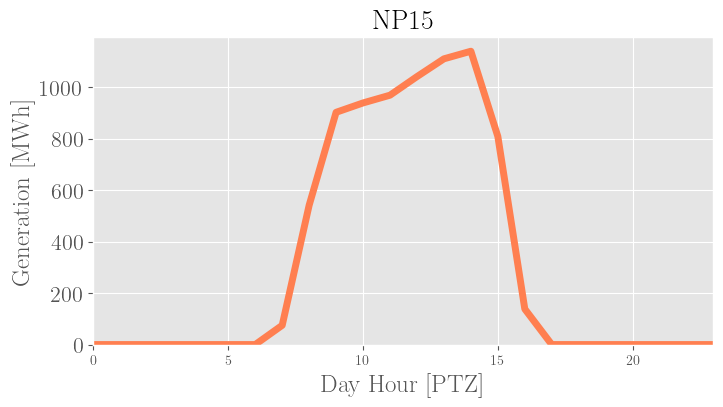

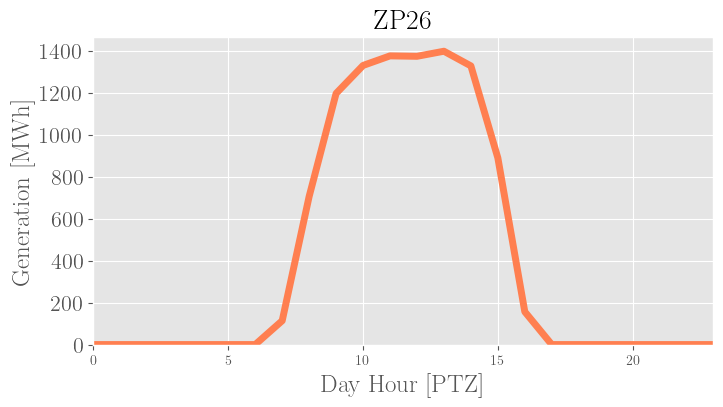

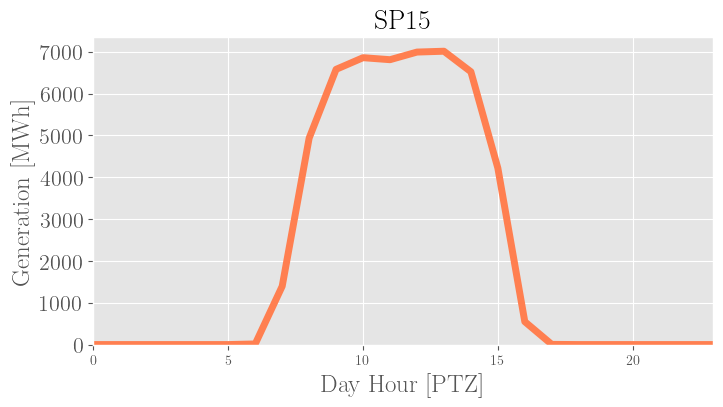

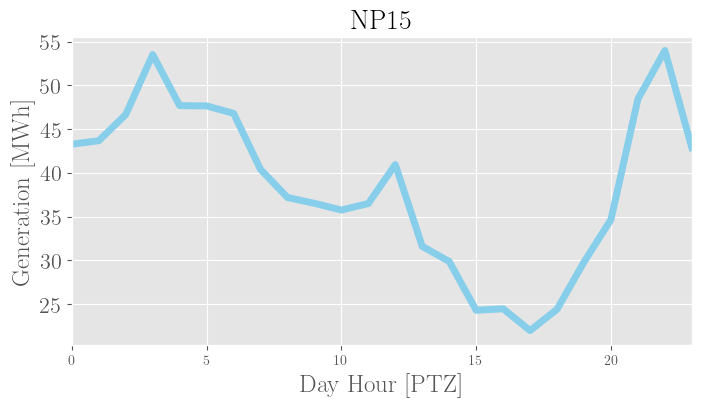

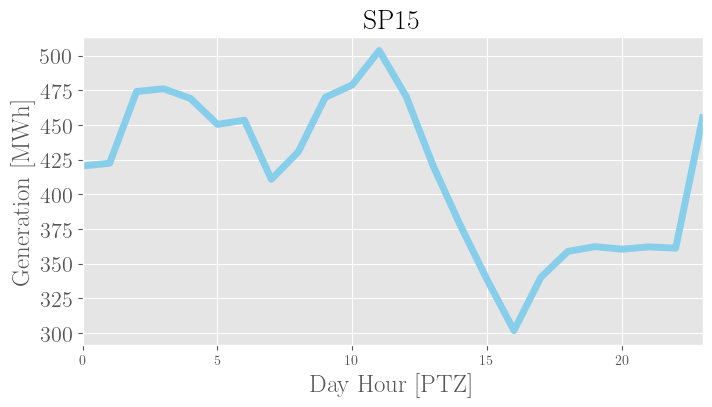

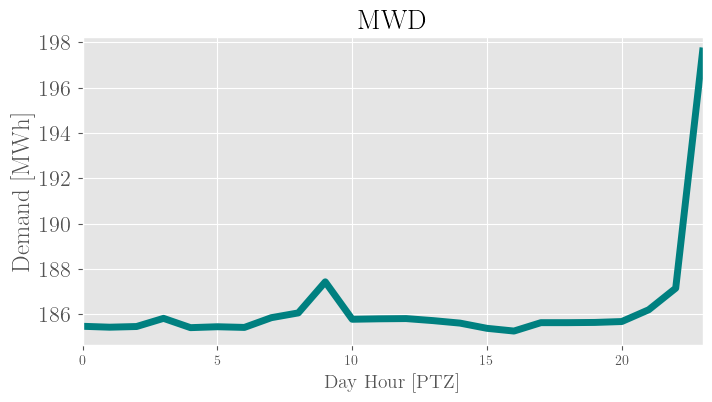

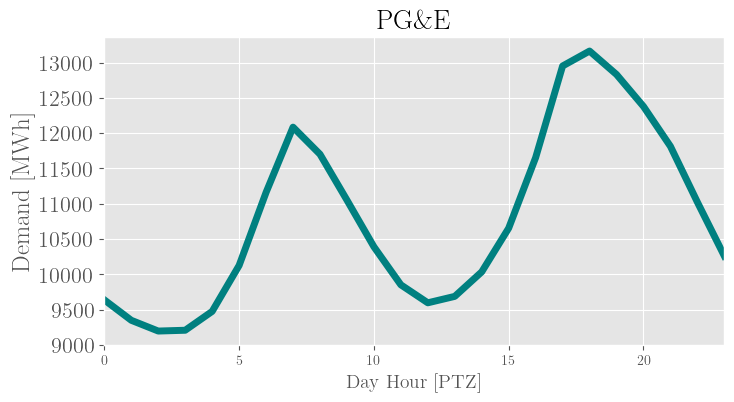

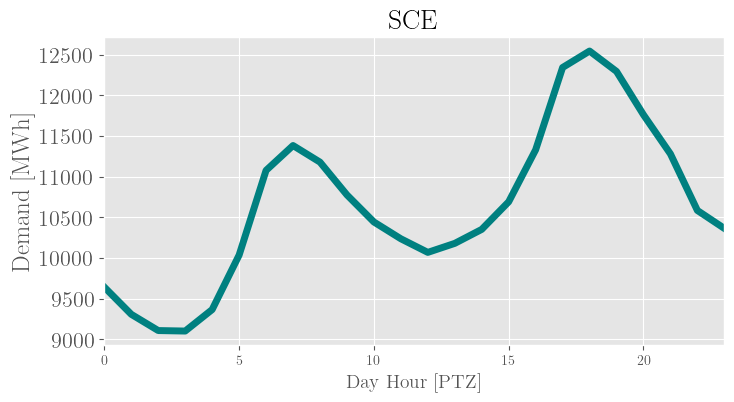

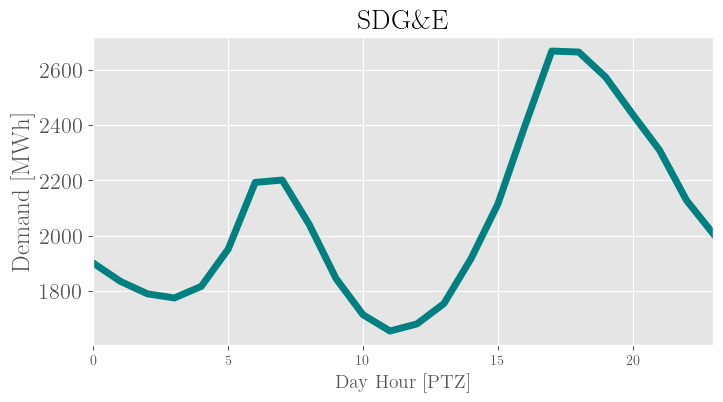

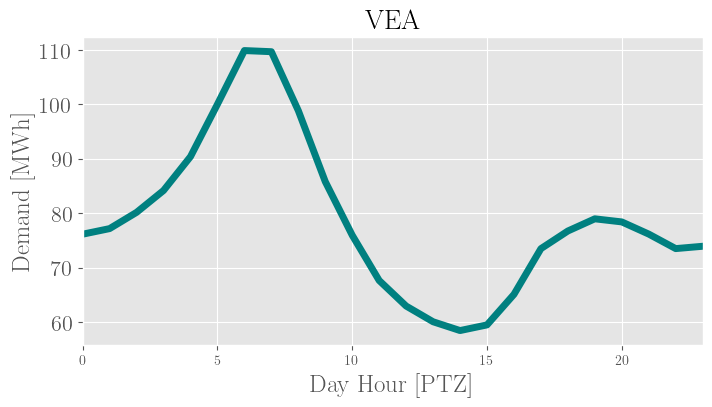

In [6]:
with plt.style.context('ggplot'):
    
    plt.figure(figsize = (8, 4))
    plt.title('NP15', fontsize = 20)
    plt.plot(ac_pp_[:, -5].T, linewidth = 5, color = 'coral')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    plt.ylim(0, )
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-NP15-Solar.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('ZP26', fontsize = 20)
    plt.plot(ac_pp_[:, -3].T, linewidth = 5, color = 'coral')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    plt.ylim(0, )
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-ZP26-Solar.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('SP15', fontsize = 20)
    plt.plot(ac_pp_[:, -4].T, linewidth = 5, color = 'coral')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    plt.ylim(0, )
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-SP15-Solar.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('NP15', fontsize = 20)
    plt.plot(ac_pp_[:, -2].T, linewidth = 5, color = 'skyblue')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    #plt.ylim(0, 200)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-NP15-Wind.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('SP15', fontsize = 20)
    plt.plot(ac_pp_[:, -1].T, linewidth = 5, color = 'skyblue')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    #plt.ylim(0, 14000)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-SP15-Wind.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('MWD', fontsize = 20)
    plt.plot(ac_pp_[:, 0].T, linewidth = 5, color = 'teal')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 14)
    plt.xlim(0, 23)
    #plt.ylim(0, 200)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-MWD-TAC.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('PG\&E', fontsize = 20)
    plt.plot(ac_pp_[:, 1].T, linewidth = 5, color = 'teal')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 14)
    plt.xlim(0, 23)
    #plt.ylim(0, 14000)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-PGE-TAC.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('SCE', fontsize = 20)
    plt.plot(ac_pp_[:, 2].T, linewidth = 5, color = 'teal')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 14)
    plt.xlim(0, 23)
    #plt.ylim(0, 13000)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-SCE-TAC.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('SDG\&E', fontsize = 20)
    plt.plot(ac_pp_[:, 3].T, linewidth = 5, color = 'teal')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 14)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.xlim(0, 23)
    #plt.ylim(0, 650)
    plt.savefig(path_to_images + "CAISO-SDGE-TAC.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (8, 4))
    plt.title('VEA', fontsize = 20)
    plt.plot(ac_pp_[:, 4].T, linewidth = 5, color = 'teal')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 23)
    #plt.ylim(0, 125)
    #plt.xticks(np.linspace(0, 23, 24)[::2], labels_1_[1:][::24], rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.savefig(path_to_images + "CAISO-VEA-TAC.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

## HRRR Data Visualization

In [ ]:
# Wind speed extrapolation at multiple altitudes (10, 60, 80, 100, and 120 m)
def _extrapolate_wind(M_10_, M_80_):
    # Compute power law
    def __power_law(m_1_, h_1, h_2, alpha_):
        return m_1_ * (h_2/h_1)**alpha_
    # Compute power law exponent
    alpha_ = (np.log(M_10_) - np.log(M_80_))/(np.log(80.) - np.log(10.))
    # Compute wind speed applying power law
    M_60_  = __power_law(M_10_, 60., 10., alpha_)
    M_100_ = __power_law(M_80_, 100., 80., alpha_)
    M_120_ = __power_law(M_80_, 120., 80., alpha_)
    return M_60_, M_100_, M_120_

# Process all chunks of data to form a dataset with a given strcuture
def _structure_dataset(data_, i_resource, i_asset, v_idx_ = None, 
                                                   w_idx_ = None,
                                                   x_idx_ = None,
                                                   y_idx_ = None,
                                                   z_idx_ = None,
                                                   D_idx_ = None):
    v_idx_ = v_idx_[i_resource]
    w_idx_ = w_idx_[i_resource]
    x_idx_ = x_idx_[i_resource]
    y_idx_ = y_idx_[i_resource]
    z_idx_ = z_idx_[i_resource]
    # Concatenate all chucks of data in matrix form
    V_, W_, X_, Y_, Z_ = [], [], [], [], []
    for i in range(len(data_)):
        
        data_[i][2][:, 7, :], data_[i][2][:, 9, :], data_[i][2][:, 10, :]  = _extrapolate_wind(data_[i][2][:, 6, :], data_[i][2][:, 8, :])
        data_[i][3][:, 8, :], data_[i][3][:, 10, :], data_[i][3][:, 11, :] = _extrapolate_wind(data_[i][3][:, 7, :], data_[i][3][:, 9, :])

        V_.append(data_[i][0][:, v_idx_])
        W_.append(data_[i][1][:, w_idx_])
        X_.append(data_[i][2][:, x_idx_, :])
        Y_.append(data_[i][3][:, y_idx_, :])
        Z_.append(data_[i][4][:, z_idx_])  
        
    V_ = np.concatenate(V_, axis = 0)
    W_ = np.concatenate(W_, axis = 0)
    X_ = np.concatenate(X_, axis = 0)
    Y_ = np.concatenate(Y_, axis = 0)
    Z_ = np.concatenate(Z_, axis = 0)
    print(V_.shape, W_.shape, X_.shape, Y_.shape, Z_.shape)
    # Apply features selection heuristic
    V_p_ = V_[:, i_asset]
    W_p_ = W_[:, i_asset]
    X_p_ = X_[..., D_idx_ > 0.]
    Y_p_ = Y_[..., D_idx_ > 0.]
    del V_, W_, X_, Y_
    # Concatenate all the dimensions
    X_pp_, Y_pp_ = [], []
    for d in range(X_p_.shape[1]):
        X_pp_.append(X_p_[:, d, :])
        Y_pp_.append(Y_p_[:, d, :])
    X_pp_ = np.concatenate(X_pp_, axis = -1)
    Y_pp_ = np.concatenate(Y_pp_, axis = -1)
    print(X_pp_.shape, Y_pp_.shape)
    del X_p_, Y_p_
    # Concatenate by hours
    V_pp_, W_pp_, X_ppp_, Y_ppp_, Z_p_ = [], [], [], [], []
    for n in range(int(V_p_.shape[0]/24)):
        k = n*24
        l = (n + 1)*24
        V_pp_.append(V_p_[k:l, ...][:,np.newaxis])
        W_pp_.append(W_p_[k:l, ...][:, np.newaxis])
        X_ppp_.append(X_pp_[k:l, ...][:, np.newaxis, :])
        Y_ppp_.append(Y_pp_[k:l, ...][:, np.newaxis, :])
        Z_p_.append(Z_[k:l, ...][:, np.newaxis, :])
    V_pp_  = np.concatenate(V_pp_, axis = 1)
    W_pp_  = np.concatenate(W_pp_, axis = 1)
    X_ppp_ = np.concatenate(X_ppp_, axis = 1)
    Y_ppp_ = np.concatenate(Y_ppp_, axis = 1)
    Z_p_   = np.concatenate(Z_p_, axis = 1)
    del W_p_, Y_pp_, Z_
    return V_pp_, W_pp_, X_ppp_, Y_ppp_, Z_p_
    #return V_pp_, V_p_, X_pp_, Y_ppp_, Z_p_

path_to_aux = r"/Users/Guille/Desktop/caiso_power/data/auxiliary/"

# Load the index of US land in the NOAA operational forecast
US_land_ = pd.read_pickle(path_to_aux + r"USland_0.125_(-125,-112)_(32,43).pkl")
US_land_ = np.ones(US_land_.shape)

# Define data structure for a given experiment
i_resource = 0
i_asset    = 0

V_, W_, X_, Y_, Z_ = _structure_dataset(data_, i_resource, i_asset, v_idx_ = [[1, 2, 3], [5, 6, 7], [8, 9]],
                                                                    w_idx_ = [[1, 2, 3], [5, 6, 7], [8, 9]], 
                                                                    x_idx_ = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 
                                                                              [1, 2, -1], [10, 11, 12, 13]],
                                                                    y_idx_ = [[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                                                                              [2, 3, -1], [11, 12, 13, 14]],
                                                                    z_idx_ = [[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 6, 7]],
                                                                    D_idx_ = US_land_)
#del data_
print(V_.shape, W_.shape, X_.shape, Y_.shape, Z_.shape)

(7701, 3) (7701, 3) (7701, 15, 9152) (7701, 15, 9152) (7701, 9)
(7701, 137280) (7701, 137280)


In [ ]:
titles_    = [[ 'PGE',  'SCE', 'SDGE'], 
              ['NP15', 'SP15', 'ZP26'], 
              ['NP15', 'SP15']][i_resource]

resources_ = ['Demand', 'Solar', 'Wind']
labels_    = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00',
              '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00',
              '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

rc('font',**{'family':'sans-serif','sans-serif':['Avenir']})
rc('text', usetex = False)

units = 1e3

plt.figure(figsize = (5, 3.5))
plt.title('{}: {}'.format(resources_[i_resource], titles_[i_asset]), fontsize = 20, weight = 'bold')
plt.plot(V_/units, color = 'gray', linewidth = 1.)
plt.ylabel('Energy (GWh)', fontsize = 14)
plt.xlabel('Time (PTZ)', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(np.linspace(0, 23, 24)[::4], labels_[::4], rotation = 0, fontsize = 12)
    
plt.xlim(0, 23)
#plt.ylim(0, )

plt.savefig(path_to_images + "CAISO-{}-{}.pdf".format(titles_[i_asset], resources_[i_resource]), bbox_inches = 'tight', 
                                                                                                 dpi         = 250)

plt.show()

In [ ]:
def _get_nwf(X_, Y_, Z_, i_day, i_hour):
    # Spatial contants
    N = 104
    M = 88
    D = int(X_.shape[-1]/(N*M))
    # Reshape sample
    X_ac_        = X_[i_hour, i_day, :].reshape(D, M, N)
    X_fc_        = Y_[i_hour, i_day, :].reshape(D, M, N)
    # Scale sample
    X_ac_[0,...] = X_ac_[0,...]/1000
    X_fc_[0,...] = X_fc_[0,...]/1000
    # Retrive sample metadata
    z_ = Z_[i_hour, i_day, :]
    return X_ac_, X_fc_, z_

path_to_data   = r"/Users/Guille/Desktop/caiso_power/data/"
path_to_map    = r"/Users/Guille/Desktop/caiso_power/data/maps/"
path_to_images = r"/Users/Guille/Desktop/caiso_power/images/"
path_to_aux    = r"/Users/Guille/Desktop/caiso_power/data/auxiliary/"

_CAISO = gpd.read_file(path_to_map + r"CAISO/Balancing_Authority_Areas_in_CA.shp")
_US    = gpd.read_file(path_to_map + r"US/tl_2022_us_state.shp")
world_ = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

W_ref_ = pickle.load(open(path_to_aux + r'ref_grid_0.125_(-125,-112)_(32,43).pkl', 'rb'))
print(W_ref_.shape)

In [ ]:
# Get Grid Dimensions

rc('font',**{'family':'sans-serif','sans-serif':['Avenir']})
rc('text', usetex = False)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize']  = 18

# v = {MWD (ac), PGE (ac), SCE (ac), SDGE (ac), VEA (ac), NP15 solar (ac), SP15 solar (ac), ZP26 solar (ac), NP15 wind (ac), SP15 wind (ac)}
# w = {MWD (fc), PGE (fc), SCE (fc), SDGE (fc), VEA (fc), NP15 solar (fc), SP15 solar (fc), ZP26 solar (fc), NP15 wind (fc), SP15 wind (fc)}
# X = {PRES (ac), DSWRF (ac), DLWRF (ac), DPT (ac), RH (ac), TMP (ac), W_10 (ac), W_60 (ac), W_80 (ac), W_100 (ac), W_120 (ac),
#      DI (ac), WC (ac), HCDH (ac), GSI (ac)}
# Y = {PRES (fc), PRATE (fc), DSWRF (fc), DLWRF (fc), DPT (fc), RH (fc), TMP (fc), W_10 (fc), W_60 (fc), W_80 (fc), W_100 (fc), W_120 (fc),
#      DI (fc), WC (fc), HCDH (fc), GSI (fc)}

labels_ac_ = ['Atmospheric Pressure', 
              'Direct Shortwave Irradiance', 
              'Direct Longwave Irradiance',
              'Dew Point', 
              'Relative Humidity', 
              'Temperature', 
              'Wind Speed (10m)', 
              'Wind Speed (60m)', 
              'Wind Speed (80m)', 
              'Wind Speed (100m)',
              'Wind Speed (120m)', 
              'Discomfort Index', 
              'Wind Chill', 
              'Heating and Cooling Degree Hours', 
              'Clear-Sky Irradiance']

units_ac_ = [r'(kPa)', 
             r'(W/m$^2$)', 
             r'(W/m$^2$)', 
             r'(K)', 
             r'(%)', 
             r'(K)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(K)', 
             r'(K)', 
             r'(K)', 
             r'(W/m$^2$)']

labels_fc_ = ['Atmospheric Pressure', 
              'Direct Shortwave Irradiance', 
              'Direct Longwave Irradiance', 
              'Dew Point', 
              'Relative Humidity', 
              'Temperature', 
              'Wind Speed (10m)', 
              'Wind Speed (60m)', 
              'Wind Speed (80m)', 
              'Wind Speed (100m)',
              'Wind Speed (120m)', 
              'Discomfort Index', 
              'Wind Chill', 
              'Heating and Cooling Degree Hours', 
              'Clear-Sky Irradiance']

units_fc_ = [r'(kPa)', 
             r'(W/m$^2$)', 
             r'(W/m$^2$)', 
             r'(K)', 
             r'(%)', 
             r'(K)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(m/s)', 
             r'(K)', 
             r'(K)', 
             r'(K)', 
             r'(W/m$^2$)']

x_0 = -124.9965272954577
x_1 = -112.00305597999721
y_0 = 32.00083368070029
y_1 = 42.99708211754898

In [10]:
def _make_plot(X_, labels_, units_, n_plots_, figsize_, idx_, title, path, file_name, save = False):
        
    fig, ax = plt.subplots(n_plots_[0], n_plots_[1], figsize = figsize_, 
                                                     squeeze = True)
    plt.suptitle(title, fontsize = 22, y = 0.9)

    N_plots = n_plots_[0]*n_plots_[1]
    
    for j in range(N_plots):
        
        ax = plt.subplot(n_plots_[0], n_plots_[1], j + 1) 

        if j >= len(idx_):
            ax.set_visible(False)
        else:
            i = idx_[j]
            


            ax.set_title(labels_[i], fontsize   = 20, 
                                     fontweight = "bold")

            im = ax.imshow(X_[i, ...], cmap   = cm.get_cmap('Spectral_r'), 
                                       origin = 'lower', 
                                       zorder = 0, 
                                       extent = [x_0, x_1, y_0, y_1])

            _US.drop(13).to_crs("EPSG:4326").plot(ax        = ax, 
                                                  linewidth = .5, 
                                                  edgecolor = 'k', 
                                                  facecolor = 'k',
                                                  color     = 'None', 
                                                  zorder    = 2)

            _CAISO.to_crs("EPSG:4326").plot(ax        = ax, 
                                            linewidth = 1.25, 
                                            edgecolor = 'k', 
                                            facecolor = 'k', 
                                            color     = 'None', 
                                            alpha     = 1., 
                                            zorder    = 3)

            world_[world_['name'] == 'Mexico'].to_crs("EPSG:4326").plot(ax        = ax, 
                                                                        linewidth = .5, 
                                                                        edgecolor = 'k', 
                                                                        facecolor = 'k',
                                                                        color     = 'None', 
                                                                        alpha     = 1., 
                                                                        zorder    = 1)

            x_ = [-124, -122, -120, -118, -116, -114]
            y_ = [34, 36, 38, 40, 42]

            ax.set_xlabel('Longitude', fontsize = 14)
            ax.set_ylabel('Latitude', fontsize = 14)

            ax.set_xlim(x_0, x_1)
            ax.set_ylim(y_0, y_1)

            ax.set_xticks(x_, x_)
            ax.set_yticks(y_, y_)

            cbar = plt.colorbar(im, shrink = .75, 
                                    pad    = 0.0125, 
                                    extend = 'both')

            cbar.set_label(units_[i], rotation = 90, 
                                      size     = 16)

    if save: plt.savefig(path + file_name, bbox_inches = 'tight',
                                           dpi         = 250)
    plt.show()


In [11]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [3, 4],
                                         figsize_  = (28, 18),
                                         idx_      = [3, 4, 5, 11, 1, 2, 14, 7, 8, 9, 10], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_ac.pdf", 
                                         save      = True)


_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [3, 4],
                                         figsize_  = (28, 18),
                                         idx_      = [3, 4, 5, 11, 1, 2, 14, 7, 8, 9, 10],
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_fc.pdf", 
                                         save      = True)

NameError: name 'X_' is not defined

In [12]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [1, 5],
                                         figsize_  = (35, 6),
                                         idx_      = [2, 3, 4, 5, 11], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_load_ac.pdf", 
                                         save      = True)


_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [1, 5],
                                         figsize_  = (35, 6),
                                         idx_      = [2, 3, 4, 5, 11], 
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_load_fc.pdf", 
                                         save      = True)

NameError: name 'X_' is not defined

[2023    1   10   10    4    1    0    0    0]


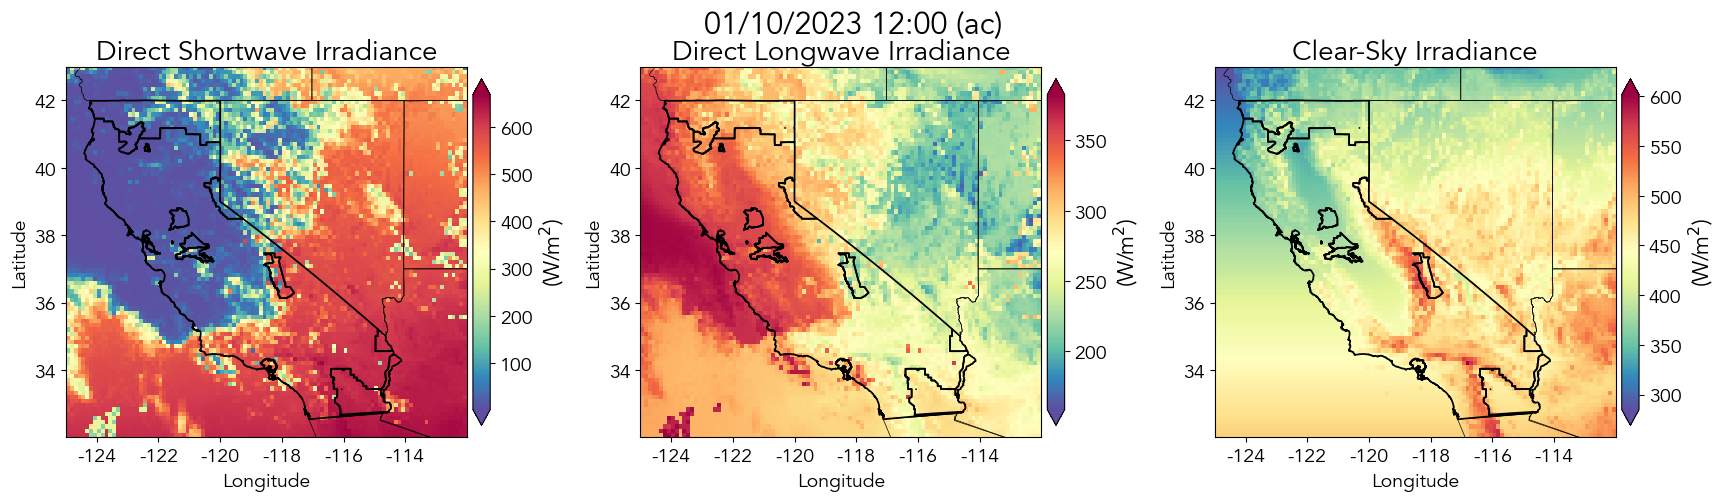

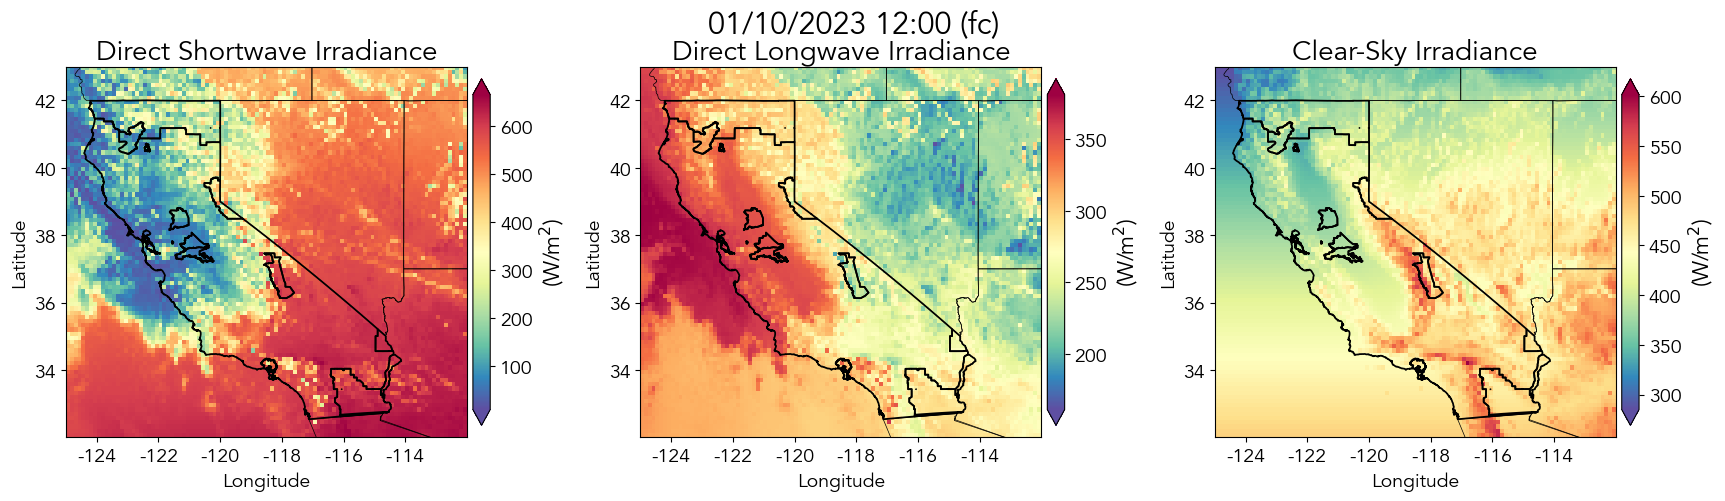

In [31]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'
print(z_)

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [1, 3],
                                         figsize_  = (21, 6),
                                         idx_      = [1, 2, 14], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_solar_ac.pdf", 
                                         save      = True)

_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [1, 3],
                                         figsize_  = (21, 6),
                                         idx_      = [1, 2, 14], 
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_solar_fc.pdf", 
                                         save      = True)

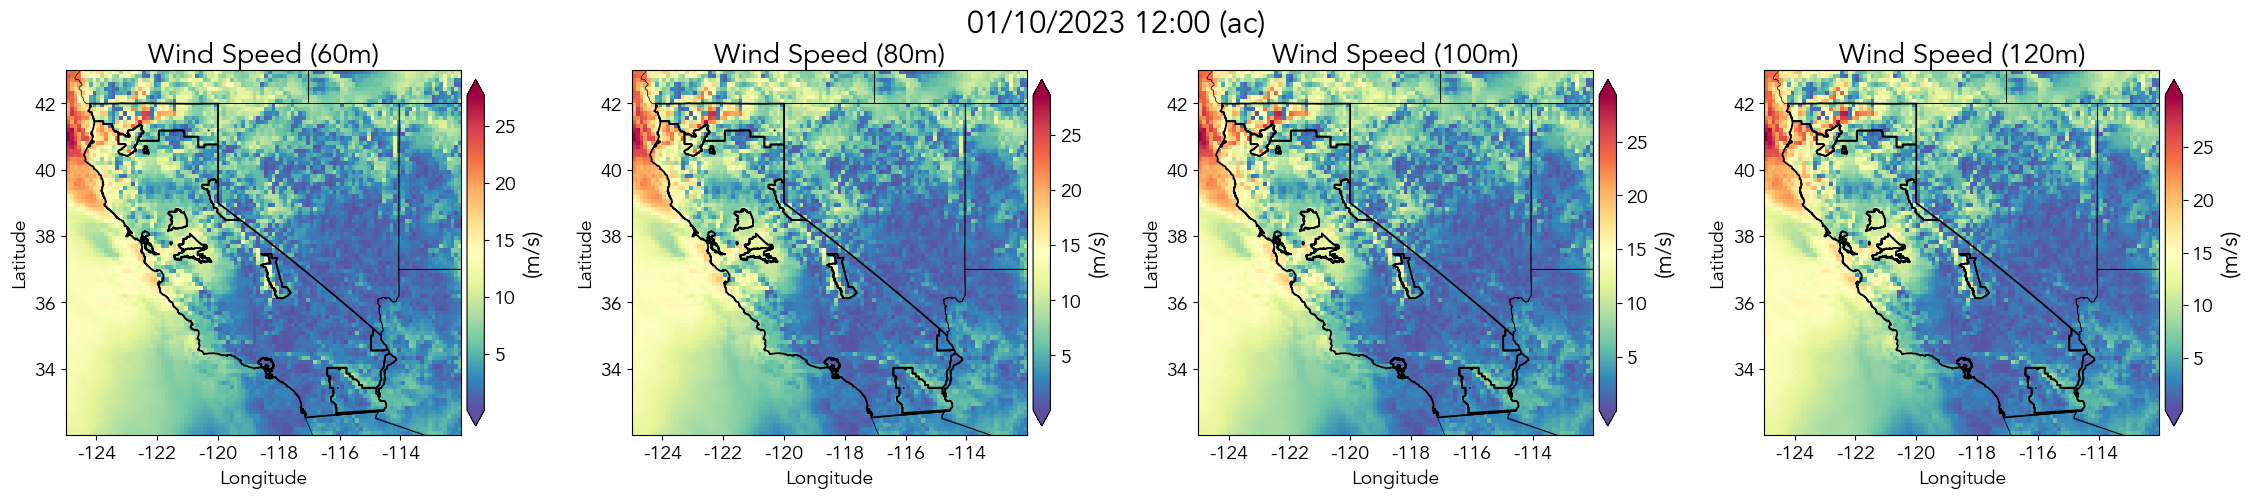

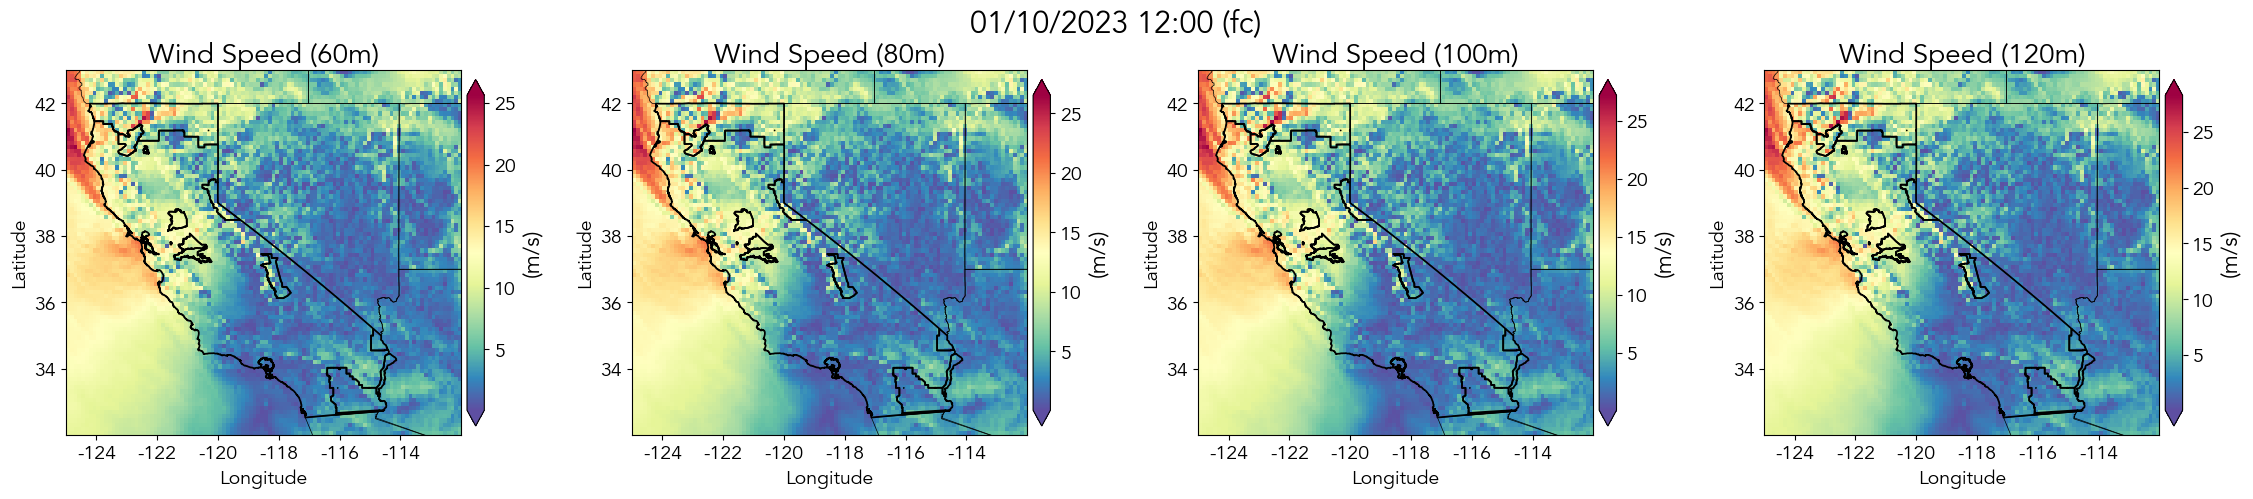

In [32]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [1, 4],
                                         figsize_  = (28, 6),
                                         idx_      = [7, 8, 9, 10], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_wind_ac.pdf", 
                                         save      = True)

_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [1, 4],
                                         figsize_  = (28, 6),
                                         idx_      = [7, 8, 9, 10], 
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_wind_fc.pdf", 
                                         save      = True)

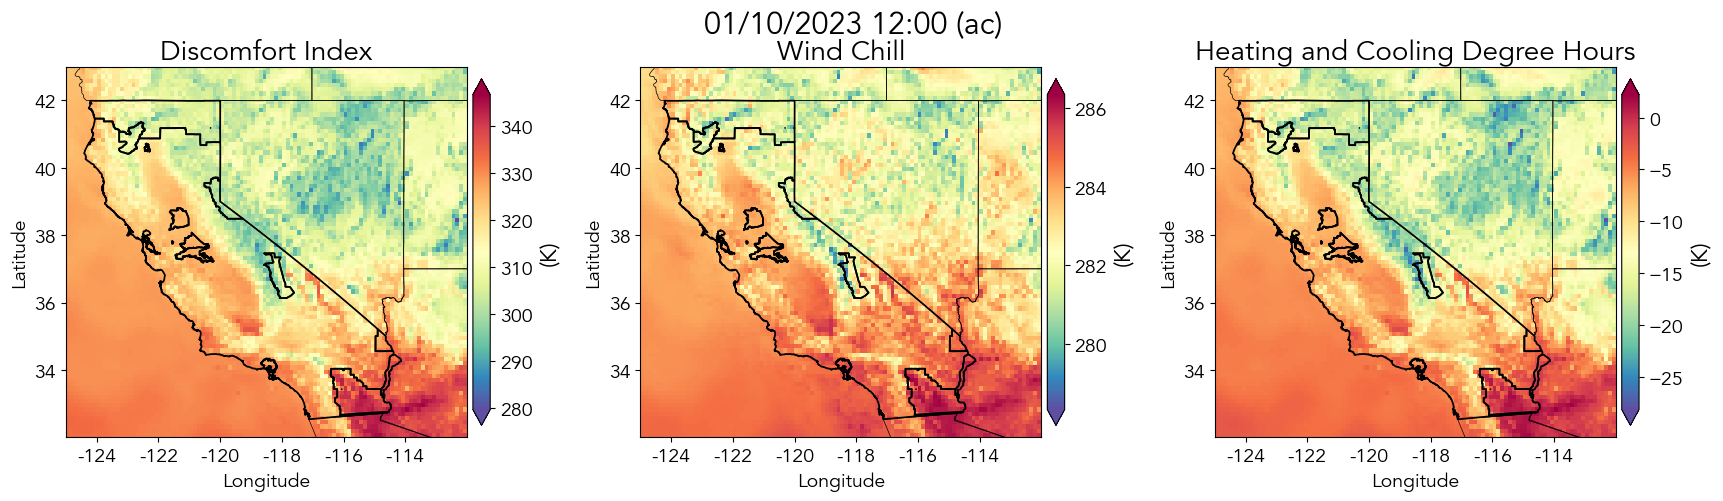

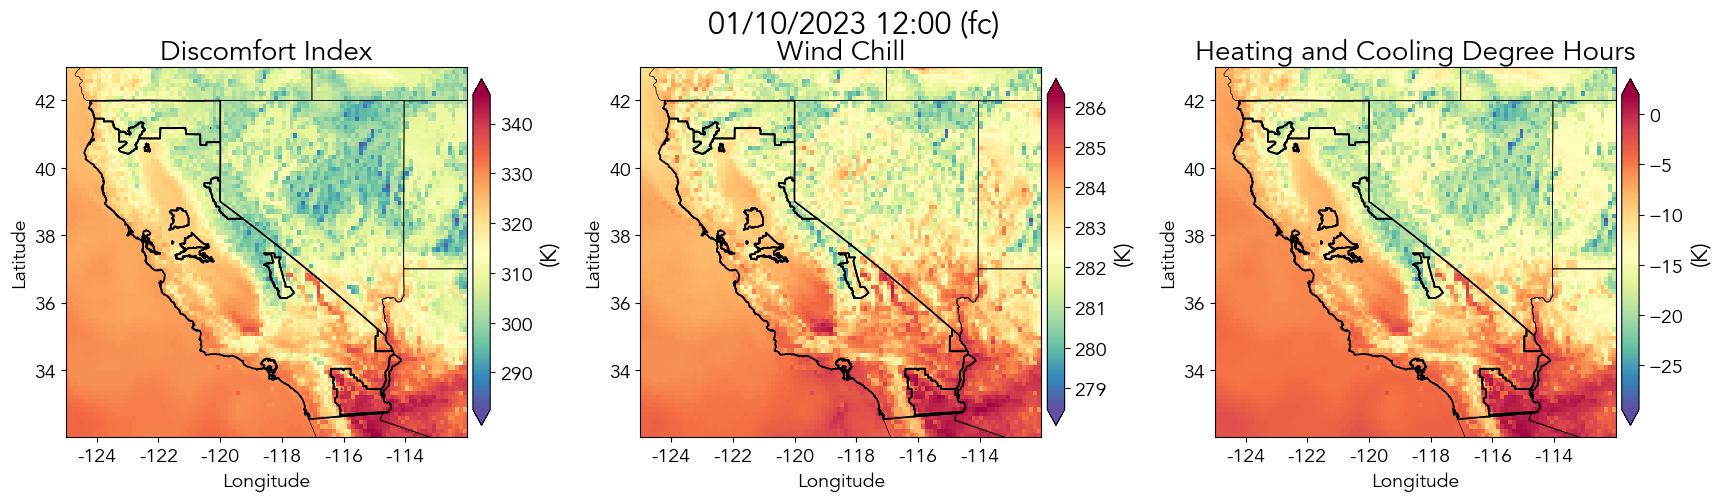

In [33]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [1, 3],
                                         figsize_  = (21, 6),
                                         idx_      = [11, 12, 13], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_ac_ddr.pdf", 
                                         save      = True)

_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [1, 3],
                                         figsize_  = (21, 6),
                                         idx_      = [11, 12, 13], 
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_fc_ddr.pdf", 
                                         save      = True)

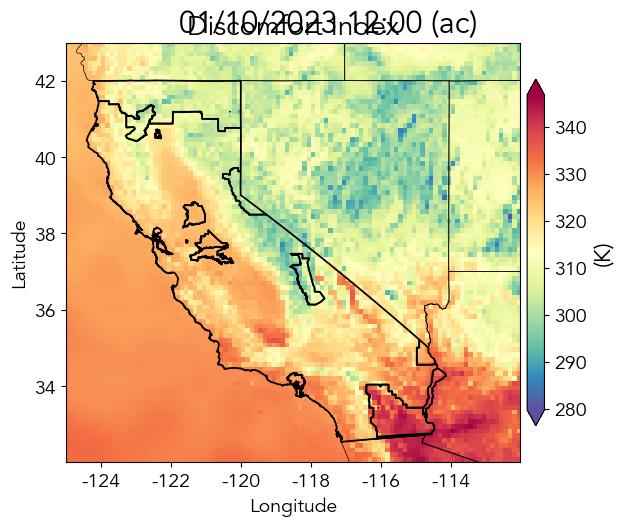

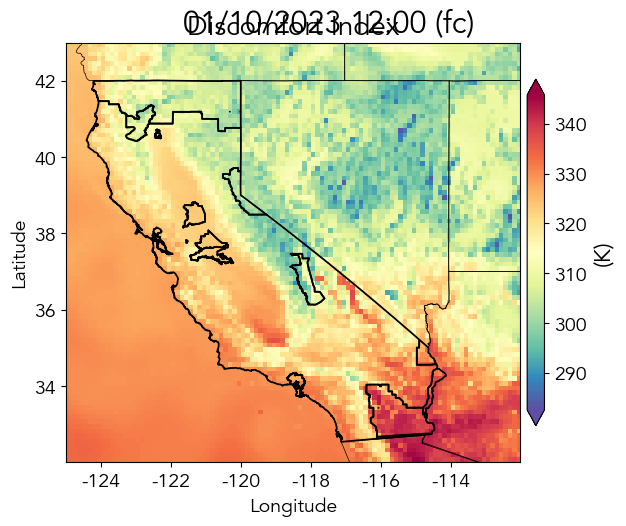

In [34]:
i_day  = 10
i_hour = 12

X_ac_, X_fc_, z_ = _get_nwf(X_, Y_, Z_, i_day, i_hour)
date = f'{z_[1]:02}/{z_[2]:02}/{z_[0]} {i_hour:02}:00'

_make_plot(X_ac_, labels_ac_, units_ac_, n_plots_  = [1, 1],
                                         figsize_  = (7, 6),
                                         idx_      = [11], 
                                         title     = date + ' (ac)',
                                         path      = path_to_images,
                                         file_name = "HRRR_ac_single.pdf", 
                                         save      = False)


_make_plot(X_fc_, labels_fc_, units_fc_, n_plots_  = [1, 1],
                                         figsize_  = (7, 6),
                                         idx_      = [11], 
                                         title     = date + ' (fc)',
                                         path      = path_to_images,
                                         file_name = "HRRR_fc_single.pdf", 
                                         save      = False)

# Extra...

In [85]:
fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

fig.set_facecolor('white')

#plt.suptitle('HRRR Day-Ahead Forecast', fontsize = 20)

ax_.title.set_text('Direct Solar Radiation')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                             linewidth = 1.25, 
                             edgecolor = 'k', 
                             facecolor = 'k',
                             color     = 'None', 
                             zorder    = 1)

im = ax_.imshow(y_[1, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha     = 0.5, 
                                zorder    = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)

plt.savefig(path_to_images + "NOAA_dr.pdf", bbox_inches = 'tight',
                                            dpi         = 100)
plt.show()

KeyboardInterrupt: 

In [ ]:
fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

fig.set_facecolor('white')

#plt.suptitle('HRRR Day-Ahead Forecast', fontsize = 20)

ax_.title.set_text('Direct Solar Radiation')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = 1.25, 
                                edgecolor = 'k', 
                                facecolor = 'k',
                                color     = 'None', zorder = 1)

im = ax_.imshow(y_[1, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha     = 0.5, 
                                zorder    = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)

plt.savefig(path_to_images + "NOAA_dr.pdf", bbox_inches = 'tight',
                                            dpi         = 100)
plt.show()

fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

ax_.title.set_text('Atmospheric Pressure')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                             linewidth = 1.25, 
                             edgecolor = 'k', 
                             facecolor = 'k',
                             color     = 'None', zorder = 1)

im = ax_.imshow(y_[0, ...]/1000., cmap   = 'magma', 
                                  origin = 'lower', 
                                  zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha     = 0.5, 
                                zorder    = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)


plt.savefig(path_to_images + "NOAA_pres.pdf", bbox_inches = 'tight', 
                                              dpi         = 100)
plt.show()

fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

ax_.title.set_text('Relative Humidiy')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = 1.25, 
                                edgecolor = 'k', 
                                facecolor = 'k',
                                color     = 'None', zorder = 1)

im = ax_.imshow(y_[3, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha = 0.5, zorder = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)


plt.savefig(path_to_images + "NOAA_rh.pdf", bbox_inches = 'tight', dpi = 100)
plt.show()

fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

ax_.title.set_text('Temperature')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = 1.25, 
                                edgecolor = 'k', 
                                facecolor = 'k',
                                color     = 'None', zorder = 1)

im = ax_.imshow(y_[4, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha = 0.5, zorder = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)

plt.savefig(path_to_images + "NOAA_tmep.pdf", bbox_inches = 'tight', 
                                              dpi = 100)
plt.show()

fig, ax_ = plt.subplots(1, figsize = (15, 4.25))

ax_.title.set_text('Wind Speed')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                             linewidth = 1.25, 
                             edgecolor = 'k', 
                             facecolor = 'k',
                             color     = 'None', 
                             zorder    = 1)

im = ax_.imshow(y_[5, ...], cmap   = 'magma', 
                            origin = 'lower', 
                            zorder = 0, 
          extent = [-124.9965272954577, -112.00305597999721, 
                    32.00083368070029, 42.99708211754898])
cbar = plt.colorbar(im)

_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'None', 
                                alpha     = 0.5, 
                                zorder    = 2)

ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)

plt.savefig(path_to_images + "NOAA_ws.pdf".format(i_day, i_hour), bbox_inches = 'tight', 
                                                                  dpi         = 100)
plt.show()

(24,) (24, 188)


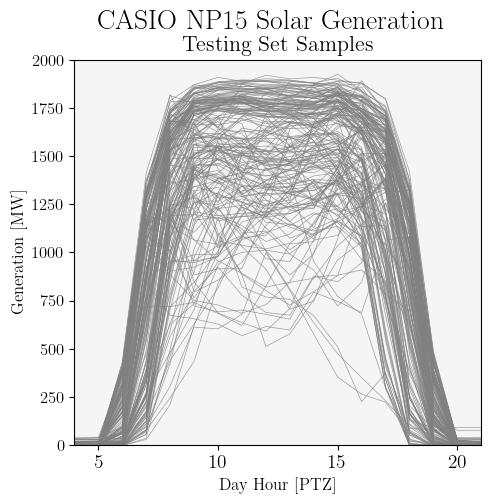

In [16]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex = True)


x_ = np.linspace(0, V_.shape[0] - 1, V_.shape[0], dtype = int) #+ 5
y_ = V_[:, -188:]
print(x_.shape, y_.shape)

fig = plt.figure(figsize = (5.25, 5))

fig.set_facecolor('white')
plt.axes().set_facecolor("whitesmoke")

plt.suptitle('CASIO NP15 Solar Generation', fontsize = 20)
plt.title('Testing Set Samples', fontsize = 16)
plt.plot(x_[4:-2], y_[4:-2], color = 'gray', linewidth = .5, alpha = 0.75)
plt.xlim(4, 21)
plt.ylim(0, 2000)
plt.ylabel('Generation [MW]', fontsize = 12)
plt.xlabel('Day Hour [PTZ]', fontsize = 12)
plt.yticks(ticks = np.linspace(0, 2000, 9), fontsize = 12)
#plt.xticks(ticks = np.linspace(5, 22, 18)[::2], fontsize = 12)
#plt.grid()
plt.savefig(path_to_images + "CAISO-NP15.pdf", dpi = 100)
plt.show()

(9152, 2)


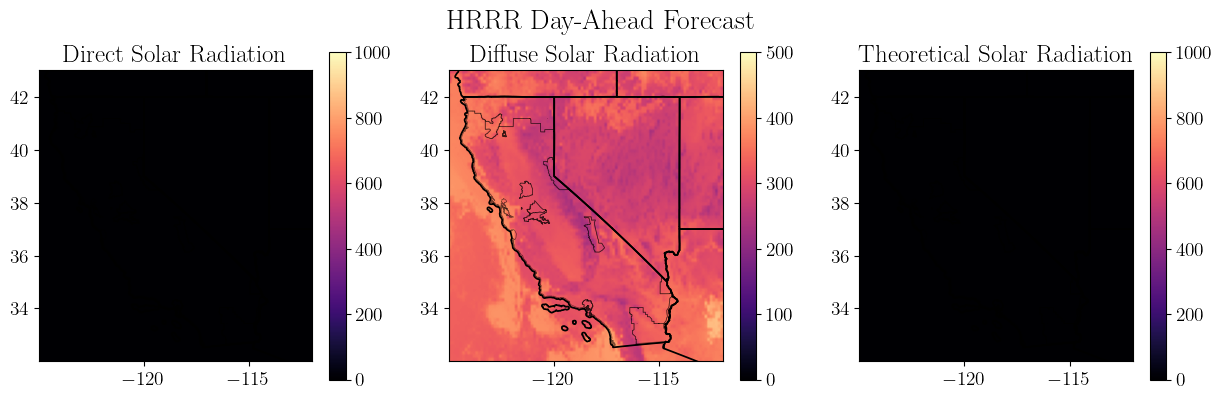

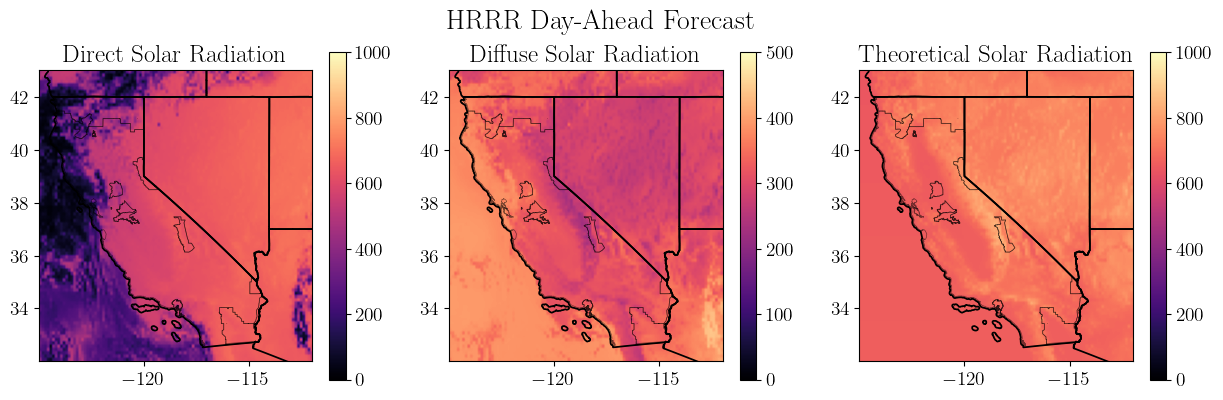

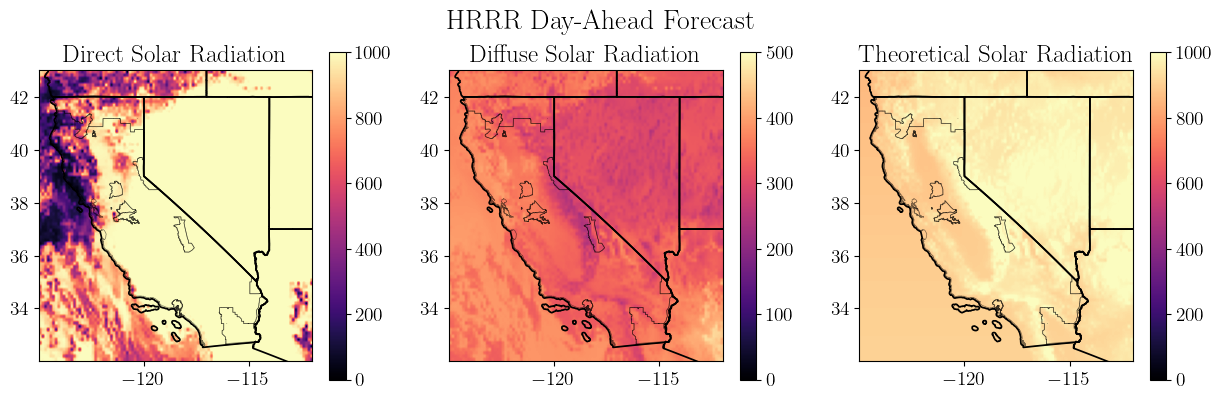

In [26]:
from matplotlib import rc
import geopandas as gpd

path_to_data = r"/Users/Guille/Desktop/caiso_power/data/"
path_to_map  = r"/Users/Guille/Desktop/extreme_scenarios/data/"
path_to_oax  = r"/Users/Guille/Desktop/caiso_power/output/auxiliary/"

_CAISO = gpd.read_file(path_to_data + r"maps/CAISO/Balancing_Authority_Areas_in_CA.shp")
_US    = gpd.read_file(path_to_map + r"tl_2022_us_state/tl_2022_us_state.shp")
W_ref_ = pickle.load(open(path_to_oax + r'ref_grid_0.125_(-125,-112)_(32,43).pkl', 'rb'))
print(W_ref_.shape)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex = True)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize']  = 18

i_hour = 8
i_day  = 180

for i_hour in [0, 8, 12]:

    x_ = X_[i_hour, i_day, :].reshape(3, M, N)
    y_ = Y_[i_hour, i_day, :].reshape(3, M, N)

    fig, ax_ = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 4.25))

    fig.set_facecolor('white')
    
    plt.suptitle('HRRR Day-Ahead Forecast', fontsize = 20)

    ax_[0].title.set_text('Direct Solar Radiation')
    
    _US.to_crs("EPSG:4326").plot(ax        = ax_[0], 
                                    linewidth = 1.25, 
                                    edgecolor = 'k', 
                                    facecolor = 'k',
                                    color     = 'None', zorder = 1)

    im = ax_[0].imshow(y_[0, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
              extent = [-124.9965272954577, -112.00305597999721, 
                        32.00083368070029, 42.99708211754898], vmin = 0, vmax = 1000)
    cbar = plt.colorbar(im)
    
    _CAISO.to_crs("EPSG:4326").plot(ax        = ax_[0], 
                                    linewidth = .5, 
                                    edgecolor = 'k', 
                                    facecolor = 'k', 
                                    color     = 'None', 
                                    alpha = 0.5, zorder = 2)

    ax_[0].set_xlim(-124.9965272954577, -112.00305597999721)
    ax_[0].set_ylim(32.00083368070029, 42.99708211754898)
    
    ax_[1].title.set_text('Diffuse Solar Radiation')

    _US.to_crs("EPSG:4326").plot(ax        = ax_[1], 
                                    linewidth = 1.25, 
                                    edgecolor = 'k', 
                                    facecolor = 'k',
                                    color     = 'None', zorder = 1)

    im = ax_[1].imshow(y_[1, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
              extent = [-124.9965272954577, -112.00305597999721, 
                        32.00083368070029, 42.99708211754898], vmin = 0, vmax = 500)
    cbar = plt.colorbar(im)
    
    _CAISO.to_crs("EPSG:4326").plot(ax        = ax_[1], 
                                    linewidth = .5, 
                                    edgecolor = 'k', 
                                    facecolor = 'k', 
                                    color     = 'None', 
                                    alpha = 0.5, zorder = 2)

    ax_[1].set_xlim(-124.9965272954577, -112.00305597999721)
    ax_[1].set_ylim(32.00083368070029, 42.99708211754898)
        
    ax_[2].title.set_text('Theoretical Solar Radiation')

    _US.to_crs("EPSG:4326").plot(ax        = ax_[2], 
                                    linewidth = 1.25, 
                                    edgecolor = 'k', 
                                    facecolor = 'k',
                                    color     = 'None', zorder = 1)

    im = ax_[2].imshow(y_[2, ...], cmap = 'magma', origin = 'lower', zorder = 0, 
              extent = [-124.9965272954577, -112.00305597999721, 
                        32.00083368070029, 42.99708211754898], vmin = 0, vmax = 1000)
    cbar = plt.colorbar(im)
    
    _CAISO.to_crs("EPSG:4326").plot(ax        = ax_[2], 
                                    linewidth = .5, 
                                    edgecolor = 'k', 
                                    facecolor = 'k', 
                                    color     = 'None', 
                                    alpha = 0.5, zorder = 2)

    ax_[2].set_xlim(-124.9965272954577, -112.00305597999721)
    ax_[2].set_ylim(32.00083368070029, 42.99708211754898)
    
    plt.savefig(path_to_images + "NOAA_{}-{}.pdf".format(i_day, i_hour), dpi = 100)
    plt.show()

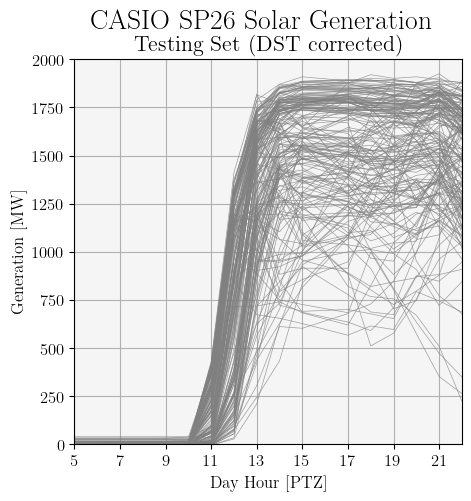

In [14]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex = True)


x_ = np.linspace(0, V_.shape[0], V_.shape[0] - 1, dtype = int) + 5
y_ = V_[:-1, -188:]


fig = plt.figure(figsize = (5, 5))

fig.set_facecolor('white')
plt.axes().set_facecolor("whitesmoke")

plt.suptitle('CASIO SP26 Solar Generation', fontsize = 20)
plt.title('Testing Set (DST corrected)', fontsize = 16)
plt.plot(x_, y_, color = 'gray', linewidth = .5, alpha = 0.75)
plt.xlim(5, 22)
plt.ylim(0, 2000)
plt.ylabel('Generation [MW]', fontsize = 12)
plt.xlabel('Day Hour [PTZ]', fontsize = 12)
plt.yticks(ticks = np.linspace(0, 2000, 9), fontsize = 12)
plt.xticks(ticks = np.linspace(5, 22, 18)[::2], fontsize = 12)
plt.grid()
plt.savefig(path_to_images + "CAISO-SP26.pdf", dpi = 100)
plt.show()

# Check LMPs Downloaded from CAISO

In [18]:
import geopandas as gpd
from shapely.geometry import Point

path_to_results = r"/Users/Guille/Desktop/caiso_power/results/"
path_to_images  = r"/Users/Guille/Desktop/caiso_power/images/"
path_to_map     = r"/Users/Guille/Desktop/extreme_scenarios/data/"
path_to_data    = r"/Users/Guille/Desktop/caiso_power/data/"
path_to_pds     = r"/Users/Guille/Desktop/caiso_power/output/processed_data/"
path_to_aux     = r"/Users/Guille/Desktop/caiso_power/output/auxiliary/"

In [19]:
data_    = pd.read_csv(path_to_aux + r'ca_node_locations.csv')
nodes_   = data_['node_id']
lat_     = data_['lat']
lon_     = data_['long']
regions_ = data_['region']
N_nodes  = data_.shape[0]
print('No. available nodes: ', N_nodes)

print(np.unique(regions_))

No. available nodes:  2533
['CA' 'LADWP' 'PGE']


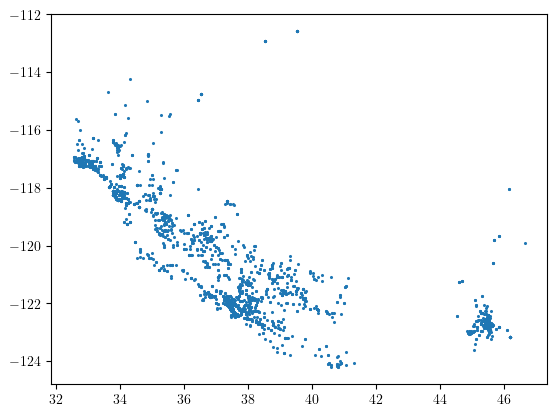

               NAME  Id                                           geometry
0              BANC   0  MULTIPOLYGON (((-137060.977 -20577.830, -13688...
1            CALISO   0  MULTIPOLYGON (((462257.252 -497407.760, 463725...
2               IID   0  POLYGON ((462362.442 -497410.335, 460826.878 -...
3             LADWP   0  MULTIPOLYGON (((155513.796 -60191.108, 156290....
4         NV Energy   0  POLYGON ((-107.678 179976.721, -109.123 179188...
5               TID   0  MULTIPOLYGON (((-49324.923 -90615.523, -48079....
6              WALC   0  MULTIPOLYGON (((498596.693 -497179.374, 495449...
7            CALISO   0  POLYGON ((-254205.250 270945.288, -254395.333 ...
8  PacificCorp West   0  POLYGON ((-193220.045 445064.081, -192189.846 ...


In [20]:
_CAISO = gpd.read_file(path_to_data + r"maps/CAISO/Balancing_Authority_Areas_in_CA.shp")
_US    = gpd.read_file(path_to_map + r"tl_2022_us_state/tl_2022_us_state.shp")
print(_CAISO)


_CAISO_prime_ = _CAISO.iloc[[1, 7]].to_crs("EPSG:4326")



In [22]:
idx_ = []
# Loop over Grid coordinates
for i in range(nodes_.shape[0]):
    if _CAISO_prime_.contains(Point([lon_[i], lat_[i]])).any():
        idx_.append(i)
        
print(len(idx_))

2032


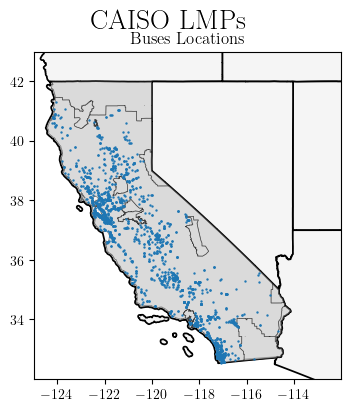

In [39]:
fig, ax_ = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 4.25))

fig.set_facecolor('white')
    
plt.suptitle('CAISO LMPs', fontsize = 20)

ax_.title.set_text('Buses Locations')

_US.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = 1.25, 
                                edgecolor = 'k', 
                                facecolor = 'k',
                                color     = 'whitesmoke', zorder = 1)


_CAISO.to_crs("EPSG:4326").plot(ax        = ax_, 
                                linewidth = .5, 
                                edgecolor = 'k', 
                                facecolor = 'k', 
                                color     = 'silver', 
                                alpha = 0.5, zorder = 2)


ax_.scatter(lon_[idx_], lat_[idx_], s = .5, zorder = 3)


ax_.set_xlim(-124.9965272954577, -112.00305597999721)
ax_.set_ylim(32.00083368070029, 42.99708211754898)


plt.show()

In [99]:
path_to_output = r"/Users/Guille/Desktop/caiso_power/output/LMPs/"
#file_name = r"CA_2C559EQ2_7_N001.pkl"
file_name = r"CA_ADCC_2_N001.pkl"
with open(path_to_output + file_name, 'rb') as _f:
    data_ = pickle.load(_f)
print(file_name)

print(data_['info'])
print(data_['2020-01-10'].shape)

CA_ADCC_2_N001.pkl
['ADCC_2_N001', 'CA', 37.632663, -121.78572866]
(12, 24)
